<a href="https://colab.research.google.com/github/gitrekm/Fraud-Detection-LR/blob/master/Fraud_Detection_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size="6">IEEE FRAUD DETECTION - Logistic Regression</font></center></h1>





<br>

## <a id='0'>Content</a>

- Importing Libraries and Modules 
- Downloading Data from Kaggle
- Visualisation 
- Data Cleaning , processing missing values, Feature Engineering....
- Logistic Regression Model Developpement 


In [0]:
#Importing Libraries and Modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns

import folium
from folium import plugins
import datetime
import math

In [23]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 62 bytes


In [3]:
#Downloading Data from Kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ieee-fraud-detection
!unzip test_identity.csv.zip
!unzip test_transaction.csv.zip
!unzip train_identity.csv.zip
!unzip train_transaction.csv.zip
!unzip sample_submission.csv.zip
!ls -ltr

 82% 43.0M/52.5M [00:00<00:00, 65.5MB/s]
100% 52.5M/52.5M [00:00<00:00, 97.4MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 99.8MB/s]
 78% 37.0M/47.3M [00:00<00:00, 52.5MB/s]
100% 47.3M/47.3M [00:00<00:00, 107MB/s] 
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 98.0MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 160MB/s]
Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
total 1432768
---------- 1 root root 683351067 Jul 15 00:19 train_transaction.csv
---------- 1 root root  26529680 Jul 15 00:19 train_identity.csv
---------- 1 root root 613194934 Jul 15 00:19 test_transaction.csv
---------- 1 root root  25797161 Jul 15 00

In [0]:
train_identity=pd.read_csv('train_identity.csv')
test_identity=pd.read_csv('test_identity.csv')
train_transaction=pd.read_csv('train_transaction.csv')
test_transaction=pd.read_csv('test_transaction.csv')

In [4]:
train_identity.head()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Text(0.5, 1.0, 'counts of missing value for train_identity')

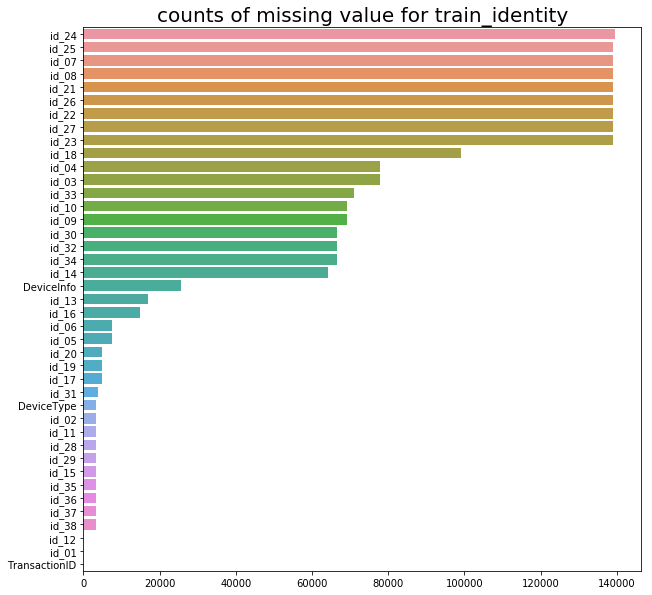

In [16]:
#Visualisation

plt.figure(figsize=(10,10))
sns.barplot(x=train_identity.isnull().sum().sort_values(ascending=False),y=train_identity.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for train_identity",size=20)

In [5]:
train_identity_new=pd.DataFrame(train_identity,columns=['TransactionID','id_01','id_12','id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11','id_02','DeviceType','id_31','id_17','id_19','id_20'])
train_identity_new=train_identity_new.dropna(subset=['id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11','id_02','DeviceType','id_31','id_17','id_19','id_20'])
train_identity_new.head()

,TransactionID,id_01,id_12,id_38,id_37,id_36,id_35,id_15,id_29,id_28,id_11,id_02,DeviceType,id_31,id_17,id_19,id_20
0,2987004,0.0,NotFound,T,T,F,T,New,NotFound,New,100.0,70787.0,mobile,samsung browser 6.2,166.0,542.0,144.0
1,2987008,-5.0,NotFound,T,F,F,T,New,NotFound,New,100.0,98945.0,mobile,mobile safari 11.0,166.0,621.0,500.0
2,2987010,-5.0,NotFound,T,T,F,F,Found,Found,Found,100.0,191631.0,desktop,chrome 62.0,121.0,410.0,142.0
3,2987011,-5.0,NotFound,T,T,F,F,New,NotFound,New,100.0,221832.0,desktop,chrome 62.0,225.0,176.0,507.0
4,2987016,0.0,NotFound,T,T,F,T,Found,Found,Found,100.0,7460.0,desktop,chrome 62.0,166.0,529.0,575.0


Text(0.5, 1.0, 'correlation plot for train_identity_new')

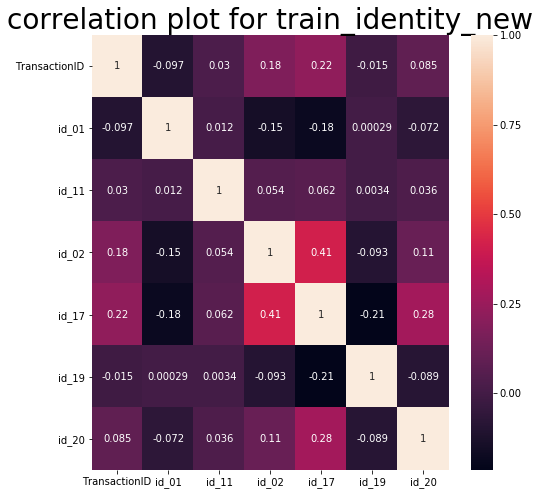

In [18]:
plt.figure(figsize=(8,8))
corr = train_identity_new.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.title("correlation plot for train_identity_new",size=28)

Text(0, 0.5, '')

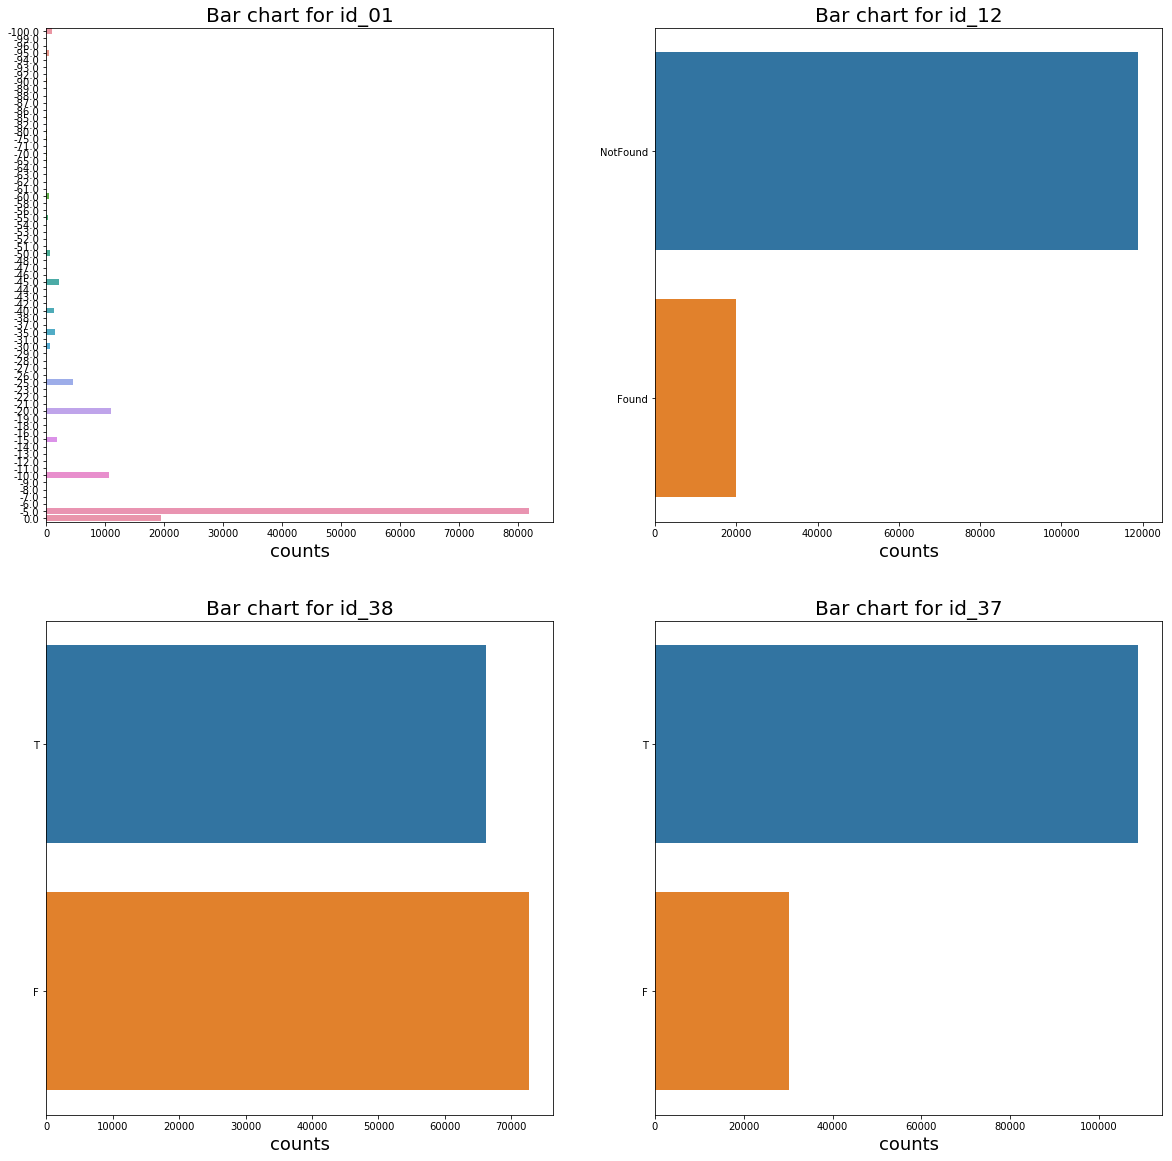

In [29]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=train_identity_new.id_01.value_counts().index
x=train_identity_new.id_01.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0],orient='h')
ax[0,0].set_title("Bar chart for id_01",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

y=train_identity_new.id_12.value_counts().index
x=train_identity_new.id_12.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("Bar chart for id_12",size=20)
ax[0,1].set_xlabel('counts',size=18)
ax[0,1].set_ylabel('')

y=train_identity_new.id_38.value_counts().index
x=train_identity_new.id_38.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0],order=['T','F'])
ax[1,0].set_title("Bar chart for id_38",size=20)
ax[1,0].set_xlabel('counts',size=18)
ax[1,0].set_ylabel('')

y=train_identity_new.id_37.value_counts().index
x=train_identity_new.id_37.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,1],order=['T','F'])
ax[1,1].set_title("Bar chart for id_37",size=20)
ax[1,1].set_xlabel('counts',size=18)
ax[1,1].set_ylabel('')

Text(0, 0.5, '')

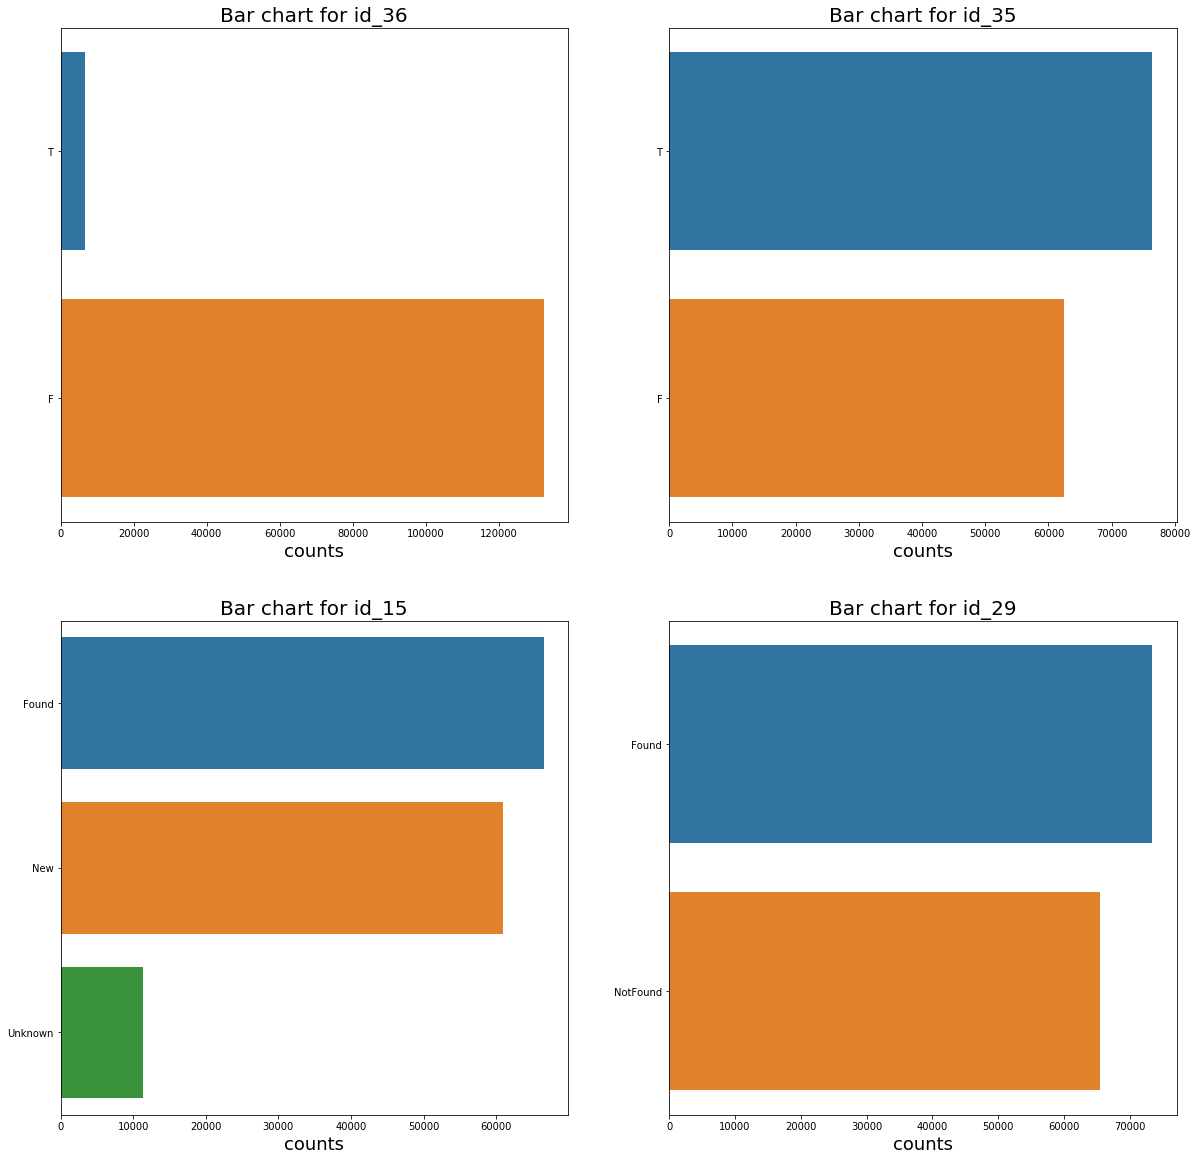

In [30]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=train_identity_new.id_36.value_counts().index
x=train_identity_new.id_36.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0],order=['T','F'])
ax[0,0].set_title("Bar chart for id_36",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

y=train_identity_new.id_35.value_counts().index
x=train_identity_new.id_35.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1],order=['T','F'])
ax[0,1].set_title("Bar chart for id_35",size=20)
ax[0,1].set_xlabel('counts',size=18)
ax[0,1].set_ylabel('')

y=train_identity_new.id_15.value_counts().index
x=train_identity_new.id_15.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("Bar chart for id_15",size=20)
ax[1,0].set_xlabel('counts',size=18)
ax[1,0].set_ylabel('')

y=train_identity_new.id_29.value_counts().index
x=train_identity_new.id_29.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,1])
ax[1,1].set_title("Bar chart for id_29",size=20)
ax[1,1].set_xlabel('counts',size=18)
ax[1,1].set_ylabel('')

In [6]:
del train_identity
del test_identity
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'counts of missing value for train_transaction')

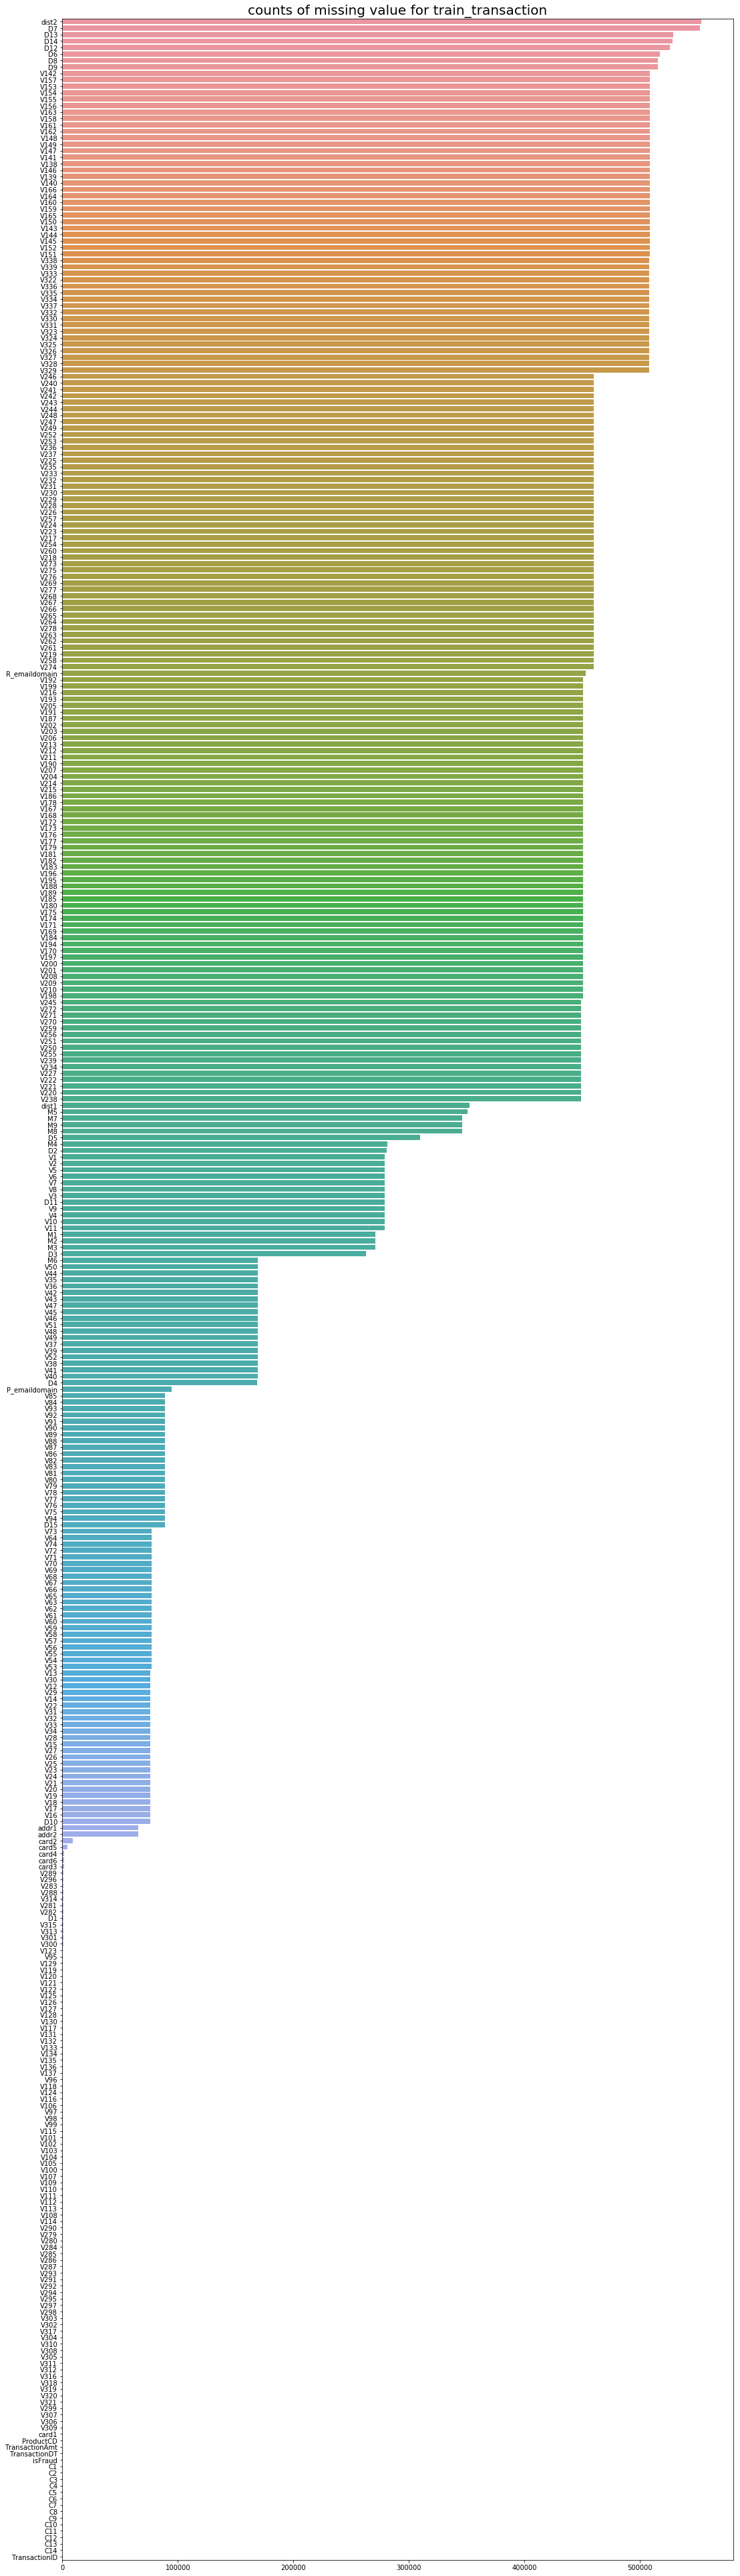

In [32]:
plt.figure(figsize=(18,70))
sns.barplot(x=train_transaction.isnull().sum().sort_values(ascending=False),y=train_transaction.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for train_transaction",size=20)

In [7]:
#Data Cleaning , processing missing values, Feature Engineering....
train_transaction_new=pd.DataFrame(train_transaction,columns=train_transaction.isnull().sum().sort_values()[:280].index)
train_transaction_new=train_transaction_new.drop(columns=['TransactionID'])
train_transaction_new_label=train_transaction_new.isFraud
train_transaction_new=train_transaction_new.drop(columns=['isFraud'])
train_transaction_new.head()

,C14,C13,C12,C11,C10,C9,C8,C7,C6,C5,C4,C3,C2,C1,TransactionDT,TransactionAmt,ProductCD,card1,V309,V306,V307,V299,V321,V320,V319,V318,V316,V312,V311,V305,V308,V310,V304,V317,V302,V303,V298,V297,V295,V294,...,V272,V245,V198,V210,V209,V208,V201,V200,V197,V170,V194,V184,V169,V171,V174,V175,V180,V185,V189,V188,V195,V196,V183,V182,V181,V179,V177,V176,V173,V172,V168,V167,V178,V186,V215,V214,V204,V207,V190,V211
0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,86400,68.5,W,13926,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,86401,29.0,W,2755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,86469,59.0,W,4663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,2.0,86499,50.0,W,18132,0.0,50.0,1758.0,0.0,0.0,0.0,0.0,790.0,50.0,135.0,0.0,1.0,925.0,354.0,0.0,1404.0,0.0,0.0,0.0,0.0,24.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,86506,50.0,H,4497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'counts of missing value for test_transaction')

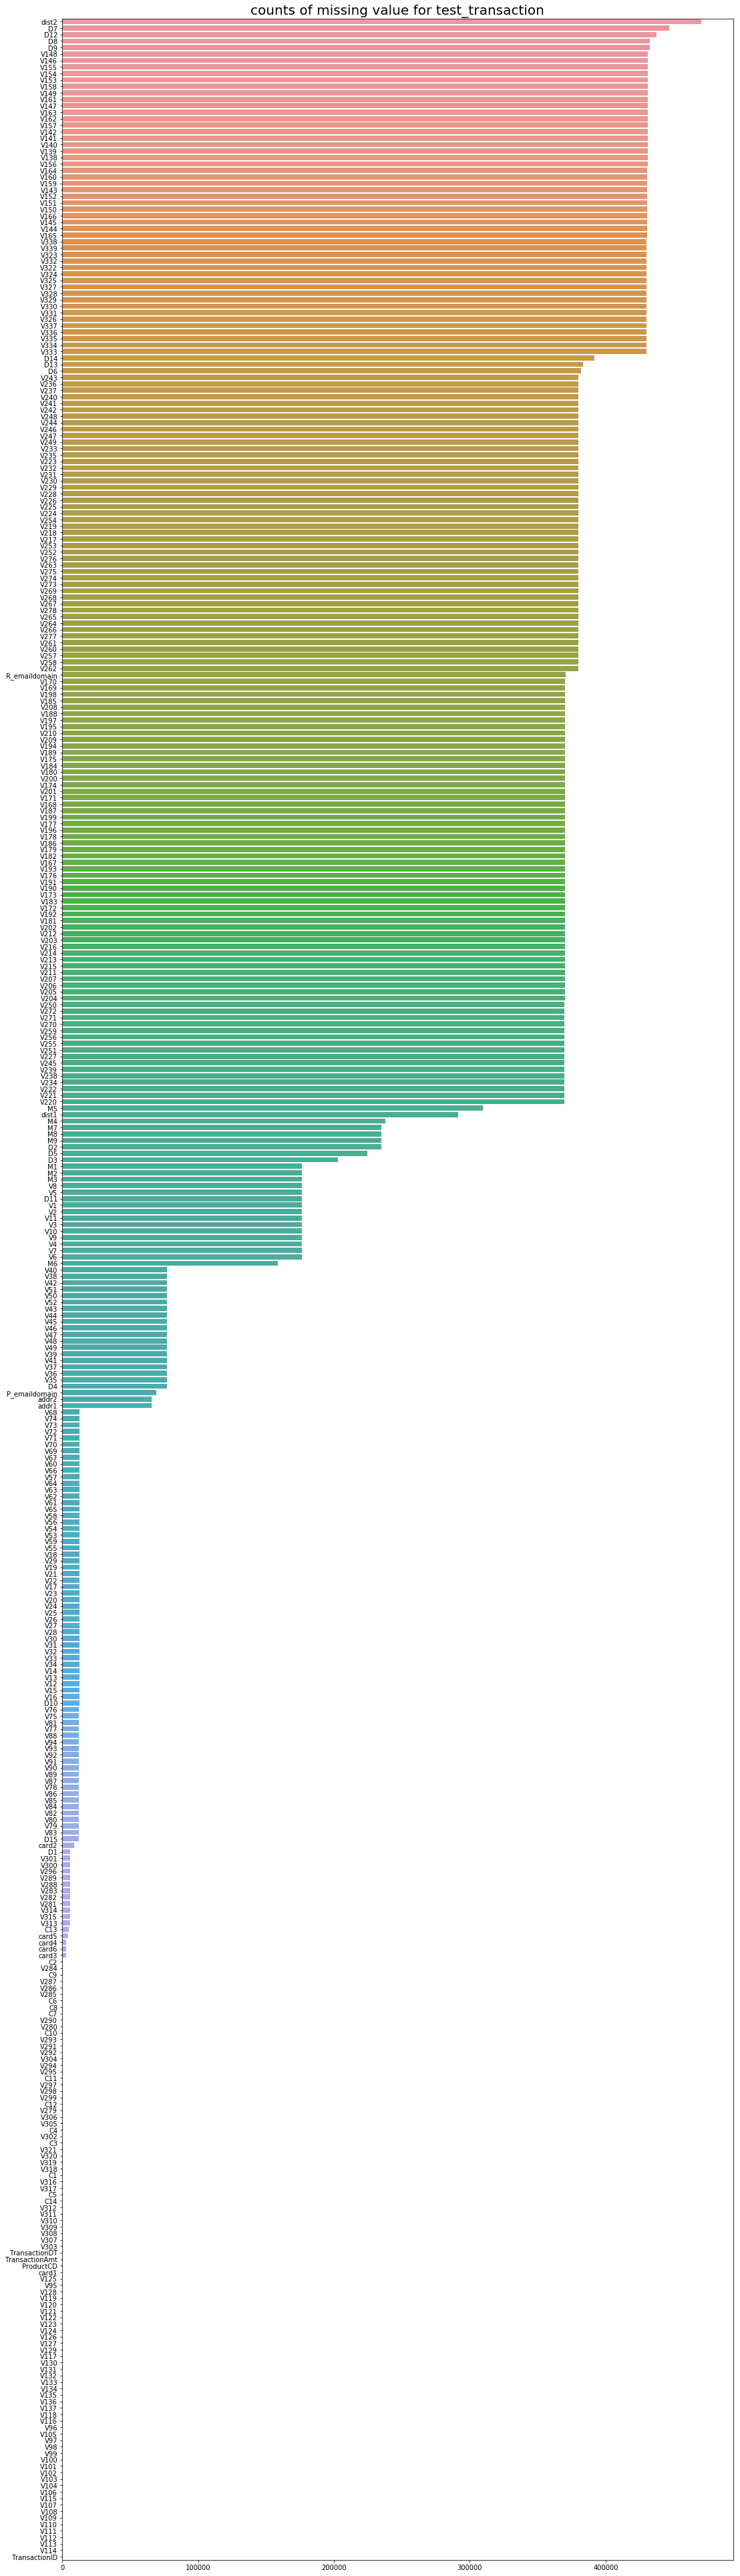

In [35]:
plt.figure(figsize=(18,70))
sns.barplot(x=test_transaction.isnull().sum().sort_values(ascending=False),y=test_transaction.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for test_transaction",size=20)

In [8]:
test_transaction_new=pd.DataFrame(test_transaction,columns=train_transaction.isnull().sum().sort_values()[:280].index)
del test_transaction
del train_transaction
ID=test_transaction_new.TransactionID
test_transaction_new=test_transaction_new.drop(columns=['TransactionID','isFraud'])
test_transaction_new.head()

,C14,C13,C12,C11,C10,C9,C8,C7,C6,C5,C4,C3,C2,C1,TransactionDT,TransactionAmt,ProductCD,card1,V309,V306,V307,V299,V321,V320,V319,V318,V316,V312,V311,V305,V308,V310,V304,V317,V302,V303,V298,V297,V295,V294,...,V272,V245,V198,V210,V209,V208,V201,V200,V197,V170,V194,V184,V169,V171,V174,V175,V180,V185,V189,V188,V195,V196,V183,V182,V181,V179,V177,V176,V173,V172,V168,V167,V178,V186,V215,V214,V204,V207,V190,V211
0,6.0,115.0,1.0,5.0,0.0,6.0,0.0,0.0,4.0,3.0,0.0,0.0,6.0,6.0,18403224,31.95,W,10409,0.000000,0.000000,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,12.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,18403263,49.00,W,4272,0.000000,0.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,77.000000,0.000000,1.0,77.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,22.0,0.0,2.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,2.0,18403310,171.00,W,4476,0.000000,0.000000,1321.000000,0.0,0.0,263.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,1058.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,7.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,18403310,284.95,W,10989,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,14.0,0.0,6.0,0.0,5.0,0.0,0.0,5.0,2.0,0.0,0.0,6.0,6.0,18403317,67.95,W,18018,67.949997,67.949997,183.850006,0.0,0.0,0.0,0.0,0.0,0.0,67.949997,67.949997,1.0,67.949997,183.850006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in list(train_transaction_new.select_dtypes(include=['object']).columns):
    test_transaction_new[i] = labelencoder.fit_transform(test_transaction_new[i].astype('str'))
    train_transaction_new[i] = labelencoder.fit_transform(train_transaction_new[i].astype('str'))
test_transaction_new.ProductCD[:5]

0    4
1    4
2    4
3    4
4    4
Name: ProductCD, dtype: int64

In [10]:
train_transaction_new.ProductCD[:5]

0    4
1    4
2    4
3    4
4    1
Name: ProductCD, dtype: int64

In [0]:
train_transaction_new=train_transaction_new.fillna(-999)
test_transaction_new=test_transaction_new.fillna(-999)

In [12]:
#Model developpement
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_transaction_new,train_transaction_new_label,test_size=0.2)
del train_transaction_new
lr = LogisticRegression(C=0.009,solver='lbfgs',max_iter=100)  
lr.fit(X_train, y_train)  
proba_test = lr.predict_proba(X_test)[:, 1]
LR_result=pd.DataFrame({'pred':proba_test,'real':y_test})
LR_result['pred_0_1']=LR_result.pred.apply(lambda x:1 if x>=0.5 else 0)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [13]:
print('LR_acc: ',sum(LR_result.real==LR_result.pred_0_1)/len(LR_result))

LR_acc:  0.9658871541301182
